In [2]:
import tensorflow as tf
import os
import sys

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import sys
    

In [10]:
proba_map = "../data/19HCA/full_prob_map.mat"

In [11]:
probamap_c = np.loadtxt(proba_map)

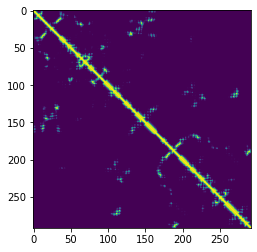

In [12]:
plt.imshow(probamap_c)

In [13]:
probamap_c.shape

(292, 292)

In [2]:
pdb = "../data/PDBs_Clean/1A8DA/file_proba_contact.mat"

In [5]:
contact = np.loadtxt(pdb)

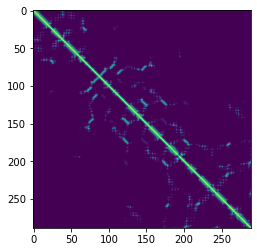

In [6]:
plt.imshow(contact)

In [77]:
contact.reshape((500,500))

ValueError: cannot reshape array of size 83521 into shape (500,500)

De ce que j'ai compris : 


- **Peeling et PU**

Le peeling est un processus itératif qui va découper la protéine en sous unités (SU), ces SU sont eux-mêmes découpés en SU jusqu'à découper ce qui est découpable de la SU (tant que R < R0). Les SU sont répertoriées dans un arbre, et la dernière étape de l'arbre correspond à tous les PU de la protéine.
Chaque PU a des coords par rapport aux résidues, et donc on peut visualiser les PU par des carrés dessinés sur la carte de probabilité de contact le long de la diagonale.

Le but du CNN est qu'il soit capable de repérer les PU juste avec la carte de proba (sans traitement au préalable ?). 


- **Carte de proba**

Si on prend l'exemple de la protéine 1A8DA (la 1ere du dossier PDBs_Clean), le fichier log indique qu'il y a eu 16 étapes de découpage (16 lignes dans l'arbre) pour donner 24 PU au final (dont 1 PU obtenu directement dès la 1ere étape : 446 452 car il est trop petit pour être découpé et ces délimitations restent les mêmes à toutes les étapes de l'arbre).

La carte de proba de cette protéine est donc : 

CARTE


Pour une première étape d'exploration, j'ai voulu dessiner les carrés délimitant les PU directement dans la matrice et afficher la nouvelle carte similairement à l'article 'Protein Peeling' : 

CARTE ARTICLE


Mais comme vous l'avez dit, la matrice n'a pas les mêmes dimensions que la taille de la protéine, comment faire sachant qu'on ne peut pas reshape la matrice pour qu'elle soit conforme au nombre de résidues (et qu'il n'y a pas de gaps dans le fichier pdb) ?


D'ailleurs, pour la découpe de la map de proba, est-il nécessaire de réaliser toutes les découpes (tous les rectangles qui représentent les étapes de l'arbre il me semble) ou bien juste les carrés sur la diagonale pour le PU ?

Quels sont les éléments sur la map qui permettent à l'oeil nu de reconnaitre un PU ?

- **Annotation COCO**

Pour que le CNN voit qu'il y a un objet, il faut mettre en valeur cet objet et le démarquer du reste de l'image. Un fichier json avec un formatage COCO qui va prendre en compte les délimitations de l'objet à délimiter permettra d'ajouter les délimitations de l'objet à l'image originale

Dans notre cas, les objets seraient les PU, et donc ces carrés dans la map de proba ?

Mais selon votre exemple de bndbox, il ne s'agit pas de délimiter un carré mais seulement les points sur la diagonale (une droite) ?